<table style="float:left; border:none">
   <tr style="border:none; background-color: #ffffff">
       <td style="border:none">
           <a href="http://www.nilu.no/">     
           <img 
               src="http://www.nilu.no/Portals/0/Logo_transparent.png" 
               style="width:100%"
           >
           </a>    
       </td>

   </tr>
</table>
<div style="float:right;"><h2>Retriving data from EBAS:</h2><h3>04. Simple data analysis</h3></div>

**We will now do some data analysis looking at greenhouse gases with solely anthropogenic source measured at the Zeppelin observatory.**
**We will focus on the primary contributing CFC's, CFC-11, CFC-12, and CFC-113.**

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from netCDF4 import num2date
from pydap.client import open_dods, open_url
%matplotlib inline
import matplotlib.pyplot as plt

/home/ror/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
output_notebook()

Loading BokehJS ...

**First, let's have a look at the data**

In [3]:
ds_cfc11 = open_dods('http://dev-ebas-pydap.nilu.no/NO0042G.online_gc.IMG.air.CFC-11.2h.NO01L_Medusa-19.NO01L_AGAGE.0.dods')
ds_cfc12 = open_dods('http://dev-ebas-pydap.nilu.no/NO0042G.online_gc.IMG.air.CFC-12.2h.NO01L_Medusa-19.NO01L_AGAGE.0.dods')
ds_cfc113 = open_dods('http://dev-ebas-pydap.nilu.no/NO0042G.online_gc.IMG.air.CFC-113.2h.NO01L_Medusa-19.NO01L_AGAGE.0.dods')

print ds_cfc11.keys()
print ds_cfc12.keys()
print ds_cfc113.keys()

['time', 'time_bounds', 'metadata_time', 'metadata_time_bounds', 'CFC-11_qc', 'CFC-11', 'CFC-11_ebasmetadata']
['time', 'time_bounds', 'metadata_time', 'metadata_time_bounds', 'CFC-12', 'CFC-12_qc', 'CFC-12_ebasmetadata']
['time', 'time_bounds', 'metadata_time', 'metadata_time_bounds', 'CFC-113_qc', 'CFC-113', 'CFC-113_ebasmetadata']


**Let's append the data to variables**

In [4]:
cfc11 = ds_cfc11['CFC-11']
cfc12 = ds_cfc12['CFC-12']
cfc113 = ds_cfc113['CFC-113']
time = num2date(cfc12.time.data,units='days since 1900-01-01 00:00:00',calendar='gregorian')

**First we have to import pandas and orderder dict in order to create a data frame**

In [5]:
import pandas as pd
from collections import OrderedDict

**We now create a data frame for all of our CFC data (CFC-11, CFC-12, and CFC-113)**

In [6]:
data = OrderedDict([ ('Time', time),
          ('cfc-11', cfc11['CFC-11']),
          ('cfc-12',  cfc12['CFC-12']),
          ('cfc-113', cfc113['CFC-113']) ] )
df = pd.DataFrame.from_dict(data)

#We set time as the index
df.index = df['Time'] 

In [7]:
#Here it could be usefull to e.g. add flags a specific column, but we will leave that out for now
#Here we have a pretty long times series
print(df.head())
print(df.tail())

                                   Time  cfc-11   cfc-12  cfc-113
Time                                                             
2010-09-01 14:31:00 2010-09-01 14:31:00     NaN      NaN      NaN
2010-09-01 16:31:00 2010-09-01 16:31:00     NaN      NaN      NaN
2010-09-01 21:55:00 2010-09-01 21:55:00     NaN      NaN   74.968
2010-09-01 23:55:00 2010-09-01 23:55:00     NaN  533.662   75.008
2010-09-02 01:55:00 2010-09-02 01:55:00     NaN  532.737   74.983
                                   Time   cfc-11  cfc-12  cfc-113
Time                                                             
2016-12-31 11:15:00 2016-12-31 11:15:00  231.304     NaN   71.557
2016-12-31 13:55:00 2016-12-31 13:55:00      NaN     NaN      NaN
2016-12-31 16:35:00 2016-12-31 16:35:00  231.648     NaN   71.305
2016-12-31 19:15:00 2016-12-31 19:15:00  231.570     NaN   71.363
2016-12-31 21:55:00 2016-12-31 21:55:00      NaN     NaN      NaN


**First lets plot the data quickly (it makes use of the matplotlib API)**

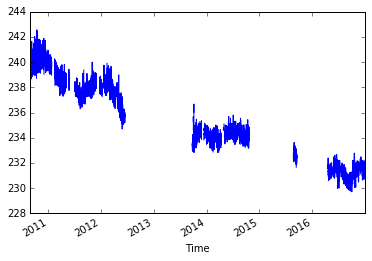

In [8]:
df['cfc-11'].plot()

**Now that we have our data frame, we could start to analyze our data**

Information regarding basic statistics functionality for the pandas package could be found here: http://pandas.pydata.org/pandas-docs/stable/basics.html

In [304]:
print(df['cfc-11'].max())
print(df['cfc-12'].min())
print(df['cfc-113'].count())

242.563
512.756
9930


**Let's resample the data and aggregate data by month**

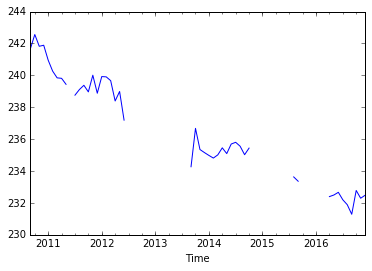

In [312]:
df_resample = df.resample('M').max()

df_resample['cfc-11'].plot()

**Okay, now let's have a look at some temperature data from the Zeppelin observatory**

In [317]:
ds_aws = open_dods('http://dev-ebas-pydap.nilu.no/NO0042G.aws.IMG.met.temperature.1h.NO01L_NO42_vaisala_15m.NO01L_platinum_resistance..dods')

time = num2date(ds_aws.time.data,units='days since 1900-01-01 00:00:00',calendar='gregorian')

#We append the data to a pandas data frame
data = OrderedDict([ ('Time', time),
          ('Temperature', ds_aws['temperature'].temperature) ] )
df = pd.DataFrame.from_dict(data)

In [318]:
print df.head()

#We set time as the index
df.index = df['Time'] 

                 Time  Temperature
0 2014-04-07 10:30:00        -13.6
1 2014-04-07 11:30:00        -14.1
2 2014-04-07 12:30:00        -14.2
3 2014-04-07 13:30:00        -14.4
4 2014-04-07 14:30:00        -14.5


**Let's do a quick plot to inspect the data**

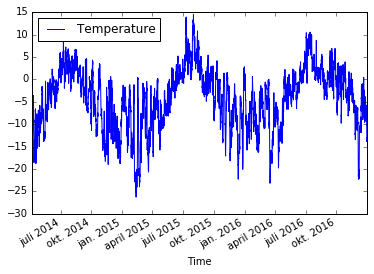

In [319]:
df.plot()

**We Resample the data**

In [320]:
df_max = df.resample('M').max()
df_min = df.resample('M').min()

**We can now make a more interactive plot we Bokeh**

We can also take a snapshot of the plot or parts of the plot, and download it as a png

In [326]:
from bokeh.models import HoverTool

p = figure(plot_width=900, plot_height=400, x_axis_type="datetime", title="Temperature 2016 at Zeppelin")

p.grid.grid_line_alpha = 2
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Temperature (Degrees C)'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1

p.line(df_max.index,df_max['Temperature'], legend='monthly max', line_width=3, line_alpha=0.8, color='#fc8d62')

p.line(df_min.index,df_min['Temperature'], legend='monthly min', line_width=3, line_alpha=0.8, color='#8da0cb')

p.legend.location = "top_right"
p.legend.click_policy="hide"

show(p)

**We can also easily download our dataproducts to a csv file**

In [331]:
filename='monthly_max_zeppelin.txt'
df_max.to_csv(filename, sep=',', encoding='utf-8')